<!-- <img src="../images/performances.png" width="100%"> -->

### RECOMENDATION SYSTEM

## Contents

- [Importing Dataset](#Importing-Dataset)  
- [EDA](#EDA)  
- [Decision Tree](#Decision-Tree)
- [K-Nearest Neighbors](#K-Nearest-Neighbors)
- [Random Forest](#Random-Forest)
- [Logistic Regression](#Logistic-Regression)
- [Support Vector Machine|Linear](#Support-Vector-Machine|Linear)
- [ Support Vector Machine|RBF](#Support-Vector-Machine|RBF)
- [Hyper Parameter tuning ](#Hyper-Parameter-tuning )
- [Random Forest After Hyper Parameter Tuning ](#Random-Forest-After-Hyper-Parameter-Tuning )
- [SVM | RBF After Tuning](#SVM-|-RBF-After-Tuning)
- [SVM | LINEAR After Tuning ](#SVM-|-LINEAR-After-Tuning )
- [SVM | 'sigmoid' After Tuning](#SVM-|-'sigmoid'-After-Tuning) 
- [SVM | Poly After Tuning ](#SVM-|-Poly-After-Tuning )
- [SVM | Poly After Tuning ](#SVM-|-Poly-After-Tuning )  
- [Logistic Regression | LR After Tuning ](#Logistic-Regression-|-LR-After-Tuning ) 
- [Herparameter Optimization for K value](#Herparameter-Optimization-for-K-value)
- [Decision Tree Model Hyperparameter optimization](#Decision-Tree-Model-Hyperparameter-optimization) 
- [Accuracy Comparision](#Accuracy-Comparision )
- [Accuracy Without Hyperparameter Tuning](#Accuracy-Without-Hyperparameter-Tuning)
- [Thank You](#Thank-You)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

### Importing Dataset

In [4]:
df = pd.read_csv('../data/diabetes.csv')

In [ ]:
type(df)

In [37]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [39]:
df.shape

(768, 9)

In [40]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [41]:
type(df)

pandas.core.frame.DataFrame

# EDA

In [14]:
df.describe() # 5 point sumary 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: xlabel='SkinThickness', ylabel='Density'>

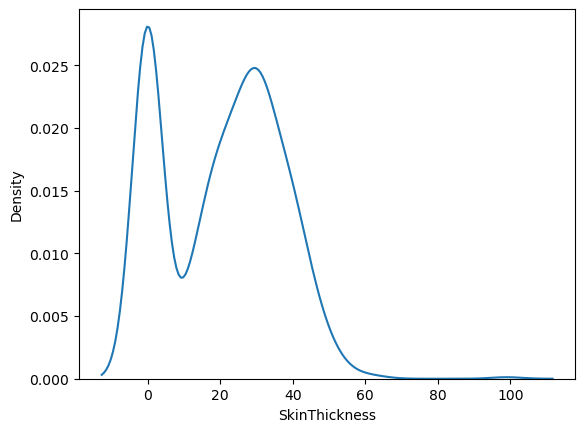

In [45]:
sns.kdeplot(df['SkinThickness'])

<AxesSubplot: >

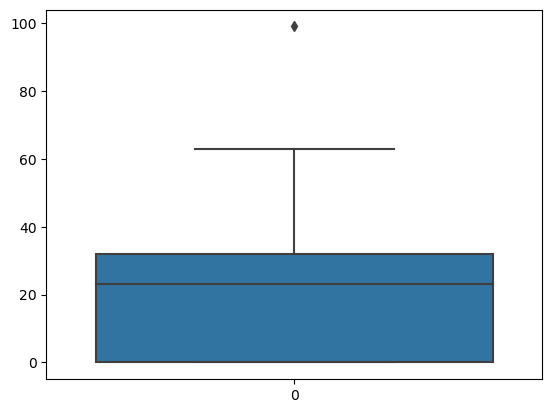

In [46]:
sns.boxplot(df['SkinThickness'])

<AxesSubplot: >

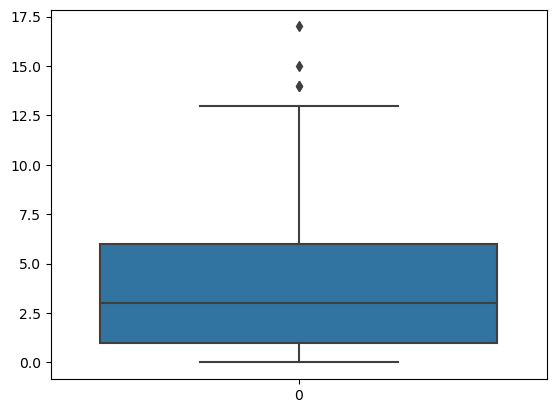

In [47]:
sns.boxplot(df['Pregnancies'])

<AxesSubplot: >

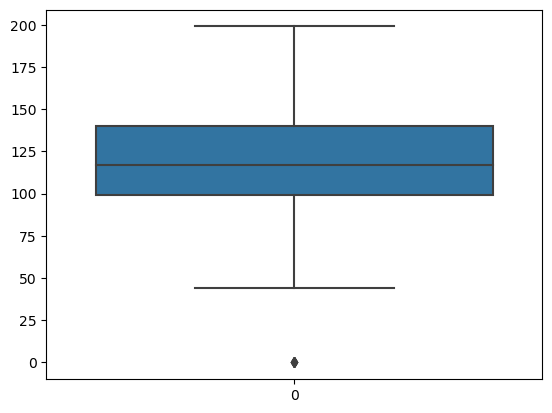

In [166]:
sns.boxplot(df['Glucose'])

<AxesSubplot: >

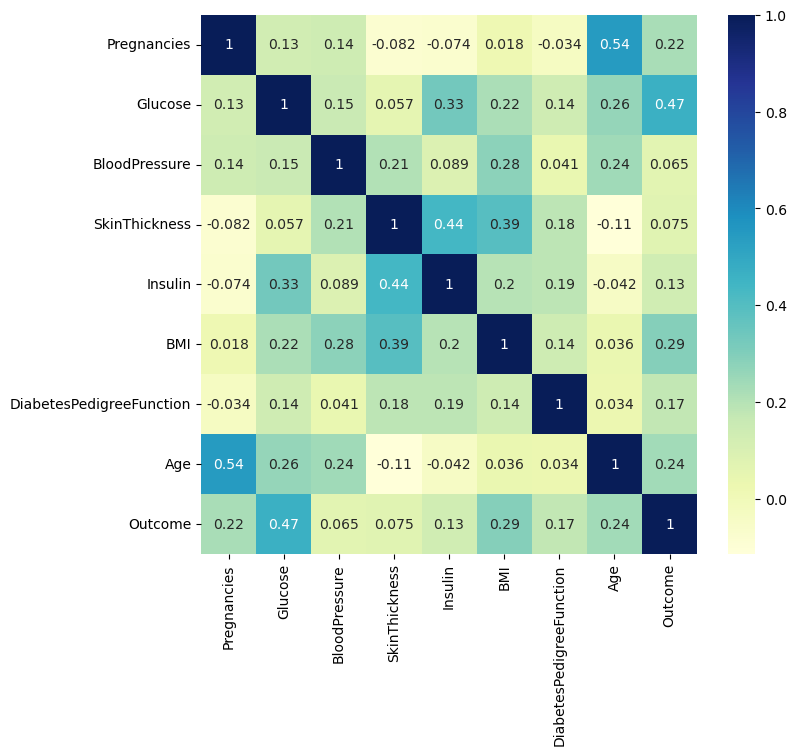

In [13]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [16]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Checking Null Value

In [17]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
IN = df.iloc[:,:-1] #.values
DN = df.iloc[:,-1] #.values

In [20]:
IN

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
x = df.drop(['Outcome'],axis = 1)

y = df['Outcome']

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
# !pip install scikit-learn

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20)

In [25]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
186,8,181,68,36,495,30.1,0.615,60
284,2,108,80,0,0,27.0,0.259,52
209,7,184,84,33,0,35.5,0.355,41
670,6,165,68,26,168,33.6,0.631,49
418,1,83,68,0,0,18.2,0.624,27
...,...,...,...,...,...,...,...,...
604,4,183,0,0,0,28.4,0.212,36
716,3,173,78,39,185,33.8,0.970,31
210,2,81,60,22,0,27.7,0.290,25
73,4,129,86,20,270,35.1,0.231,23


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier  # load Decision libraries
 
dtc = DecisionTreeClassifier()   # create a decision tree class

dtc.fit(xtrain,ytrain)

dtc.score(xtest,ytest)

0.7597402597402597

### Scope hyper parameter tuing for DT

In [28]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    recall_score,
)

Accuracy :  0.7597402597402597
specificity1 :  0.84
Sensitivity :  0.6111111111111112
MCC :  0.4621550622759656
AUC :  0.7255555555555555
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix : 



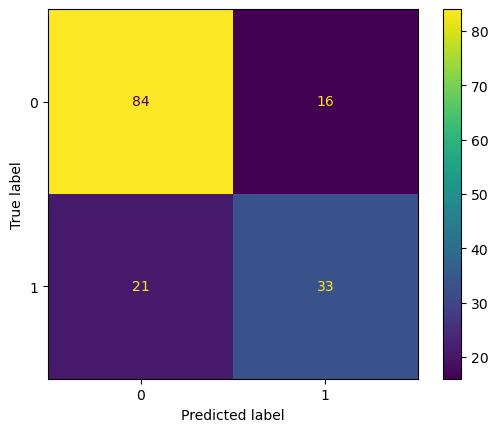

In [30]:
pred_dtc = dtc.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_dtc)


total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_dtc))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_dtc))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_dtc))


print('Confusion Matrix : \n')
conf_matrix1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
conf_matrix1.plot()

### K-Nearest Neighbors

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 16)

knn.fit(xtrain,ytrain)

knn.score(xtest,ytest)

0.6818181818181818

In [ ]:
# Scopre of hyper parameter tuning

In [105]:
x.head(1) #, y[0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [110]:
Pregnancies = 5
Glucose = 87
Age = 60
BloodPressure = 80
BMI = 12.173913043478262
SkinThickness = 35
DiabetesPedigreeFunction = 0.627
knn.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,0,BMI,DiabetesPedigreeFunction,60]])

array([0], dtype=int64)

In [106]:
56/(4.6)

12.173913043478262

In [11]:
pred_knn = knn.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_knn)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_knn))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_knn))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_knn))

Confusion Matrix : 
 [[81 15]
 [34 24]]
Accuracy :  0.6818181818181818
specificity1 :  0.84375
Sensitivity :  0.41379310344827586
MCC :  0.2869579851645234
AUC :  0.6287715517241379
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        96
           1       0.62      0.41      0.49        58

    accuracy                           0.68       154
   macro avg       0.66      0.63      0.63       154
weighted avg       0.67      0.68      0.66       154



### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(xtrain,ytrain)

rfc.score(xtest,ytest)

0.7272727272727273

#### Scope of hyper parameter tuning  and corss validations

In [12]:
pred_rfc = rfc.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_rfc)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_rfc))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_rfc))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_rfc))

Confusion Matrix : 
 [[95 22]
 [11 26]]
Accuracy :  0.7857142857142857
specificity1 :  0.811965811965812
Sensitivity :  0.7027027027027027
MCC :  0.47473127343114396
AUC :  0.7573342573342574
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       117
           1       0.54      0.70      0.61        37

    accuracy                           0.79       154
   macro avg       0.72      0.76      0.73       154
weighted avg       0.81      0.79      0.79       154



### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(xtrain,ytrain)

logReg.score(xtest,ytest)

C:\Users\panka\anaconda33\envs\cv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7467532467532467

#### scope of  hyper parameter tuning and cross validations

In [14]:
pred_logReg = logReg.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_logReg)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_logReg))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_logReg))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_logReg))

Confusion Matrix : 
 [[96 21]
 [13 24]]
Accuracy :  0.7792207792207793
specificity1 :  0.8205128205128205
Sensitivity :  0.6486486486486487
MCC :  0.4407543676618945
AUC :  0.7345807345807346
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       117
           1       0.53      0.65      0.59        37

    accuracy                           0.78       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.80      0.78      0.79       154



### Support Vector Machine|Linear

In [15]:
from sklearn.svm import SVC

svml = SVC(kernel = 'linear')

svml.fit(xtrain,ytrain)

svml.score(xtest,ytest)

0.7987012987012987

#### scope of  hyper parameter tuning and cross validations

In [16]:
pred_svml = svml.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_svml)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_svml))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_svml))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_svml))

Confusion Matrix : 
 [[97 20]
 [11 26]]
Accuracy :  0.7987012987012987
specificity1 :  0.8290598290598291
Sensitivity :  0.7027027027027027
MCC :  0.4963873813774586
AUC :  0.7658812658812658
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       117
           1       0.57      0.70      0.63        37

    accuracy                           0.80       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.82      0.80      0.81       154



### Support Vector Machine|RBF

In [58]:
from sklearn.svm import SVC

svmr = SVC(kernel = 'rbf')

svmr.fit(xtrain,ytrain)

svmr.score(xtest,ytest)

0.7467532467532467

### scope of  hyper parameter tuning and cross validations

In [18]:
pred_svmr = svmr.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_svmr)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_svmr))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_svmr))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_svmr))

Confusion Matrix : 
 [[106  11]
 [ 15  22]]
Accuracy :  0.8311688311688312
specificity1 :  0.905982905982906
Sensitivity :  0.5945945945945946
MCC :  0.5212132688864239
AUC :  0.7502887502887504
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       117
           1       0.67      0.59      0.63        37

    accuracy                           0.83       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.83      0.83      0.83       154



# Hyper Parameter tuning 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

# SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,9,20, 50], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}

In [50]:
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
# models_opt.append(('SVM', SVC(), SVM_params))

In [51]:
models_opt

[('LR', LogisticRegression(), {'C': [0.001, 0.1, 1, 10, 100]}),
 ('LDA',
  LinearDiscriminantAnalysis(),
  {'n_components': [None, 1, 2, 3], 'solver': ['svd'], 'shrinkage': [None]}),
 ('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [1, 5, 10, 9, 20, 50], 'p': [2], 'metric': ['minkowski']}),
 ('DTC',
  DecisionTreeClassifier(),
  {'criterion': ['entropy', 'gini'], 'max_depth': [10, 50, 100]}),
 ('RFC', RandomForestClassifier(), {'n_estimators': [10, 50, 100]})]

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation.KFold(n=4, n_folds=2, shuffle=False,random_state=None)
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

In [32]:
import time
start = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25 , random_state = 0)
end = time.time()
print("Time consumed in working: ",end - start)

Time consumed in working:  0.06753969192504883


In [67]:
results = []
names = []


def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    
    
    for name, model, params in models_opt:
    
        #kfold = KFold(len(X_train), n_folds=5, random_state=2, shuffle=True)
        skfold=StratifiedKFold(n_splits=5)
        leave_validation=LeaveOneOut()

        model_grid = GridSearchCV(model, params)

        cv_results = cross_val_score(model_grid, X_train, Y_train, cv =leave_validation, scoring=scoring)

        results.append(cv_results)

        names.append(name)

        msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

        print(msg)

In [68]:
estimator_function(models_opt, scoring = 'accuracy')

Cross Validation Accuracy LR: Accarcy: 0.751736 SD: 0.432006
Cross Validation Accuracy LDA: Accarcy: 0.750000 SD: 0.433013
Cross Validation Accuracy KNN: Accarcy: 0.701389 SD: 0.457649
Cross Validation Accuracy DTC: Accarcy: 0.647569 SD: 0.477727
Cross Validation Accuracy RFC: Accarcy: 0.744792 SD: 0.435978


In [ ]:
# leave_validation=LeaveOneOut()  
Cross Validation Accuracy LR: Accarcy: 0.751736 SD: 0.432006
Cross Validation Accuracy LDA: Accarcy: 0.750000 SD: 0.433013
Cross Validation Accuracy KNN: Accarcy: 0.701389 SD: 0.457649
Cross Validation Accuracy DTC: Accarcy: 0.637153 SD: 0.480821
Cross Validation Accuracy RFC: Accarcy: 0.736111 SD: 0.440740

In [62]:
import time
from contextlib import contextmanager
@contextmanager
def timer():
    """Helper for measuring runtime"""

    time0 =  time.perf_counter()
    
    yield
    print('[elapsed time: %.18f s]' % (time.perf_counter() - time0))

## Random Forest After Hyper Parameter Tuning 

In [65]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [66]:
with timer() as t:
    rf=RandomForestClassifier()
    rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
    rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[elapsed time: 210.705565000185742974 s]


In [72]:
# rf=RandomForestClassifier()
# rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
#                                random_state=100,n_jobs=-1)
# ### fit the randomized model
# rf_randomcv.fit(X_train,Y_train)

In [67]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [68]:
best_random_grid=rf_randomcv.best_estimator_

In [69]:
from sklearn.metrics import accuracy_score
y_predRM=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,y_predRM))
print("Training Accuracy Score {}".format(best_random_grid.score(X_train,Y_train)))
print("Testing Accuracy Score {}".format(accuracy_score(Y_test,y_predRM)))
print("Classification report: {}".format(classification_report(Y_test,y_predRM)))

[[119  11]
 [ 30  32]]
Training Accuracy Score 0.8802083333333334
Testing Accuracy Score 0.7864583333333334
Classification report:               precision    recall  f1-score   support

           0       0.80      0.92      0.85       130
           1       0.74      0.52      0.61        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.78      0.79      0.77       192



In [70]:
# Random forest
cm1 = confusion_matrix(Y_test,y_predRM)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predRM))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predRM))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predRM))

Confusion Matrix : 
 [[119  11]
 [ 30  32]]
Accuracy :  0.7864583333333334
specificity1 :  0.9153846153846154
Sensitivity :  0.5161290322580645
MCC :  0.48398811243317297
AUC :  0.7157568238213399
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       130
           1       0.74      0.52      0.61        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.78      0.79      0.77       192



# Pickel it

In [71]:
pickle.dump(rf_randomcv, open('../PICKEL/RFmodel.pkl','wb'))

### De-Pickel it

In [72]:
# Loading model to compare the results
modelRF = pickle.load(open('../PICKEL/RFmodel.pkl','rb'))

In [78]:
modelRF.predict([[6.000,148.000,72.000,35.000,0.000,33.600,0.627,50.000]])

array([1], dtype=int64)

In [76]:
df.iloc[0].T

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Training Accuracy Score 0.9114583333333334
Testing Accuracy Score 0.7760416666666666
precision    
recall  
f1-score

In [30]:
(80+71)/2

75.5

<img src="../images/confusion_Matrix.jpeg" width="70%">

In [28]:
# Confusion Matrix : 
#  [[118  12]
#  [ 28  34]]
TP = 118
FP = 12
FN = 28
TN = 34

In [29]:
# Random forest
def fun(TP,FN,FP,TN):
    print("Random Forest on BCWD")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [30]:
fun(TP,FN,FP,TN)

Random Forest on BCWD
TP 118
FN 28
FP 12
TN 34
Accuracy : 0.7916666666666666
Precision : 0.9076923076923077
Recall : 0.8082191780821918 
F1_score : 0.8550724637681159
TPR : 0.9076923076923077
FPR : 0.2608695652173913


<img src="../images/performances.png" width="100%">

# SVM | RBF After Tuning

In [35]:
from contextlib import contextmanager
@contextmanager
def timer():
    """Helper for measuring runtime"""

    time0 =  time.perf_counter()
    
    yield
    print('[elapsed time: %.18f s]' % (time.perf_counter() - time0))

In [81]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='rbf',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_rbf= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_rbf)))
    print(classification_report(Y_test, y_predSVM_rbf))
    print(confusion_matrix(Y_test, y_predSVM_rbf))

training score : 0.7586805555555556
testing score : 0.7708333333333334
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       130
           1       0.72      0.47      0.57        62

    accuracy                           0.77       192
   macro avg       0.75      0.69      0.71       192
weighted avg       0.76      0.77      0.76       192

[[119  11]
 [ 33  29]]
[elapsed time: 3.734715000027790666 s]


In [82]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_rbf)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_rbf))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_rbf))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_rbf))

Confusion Matrix : 
 [[119  11]
 [ 33  29]]
Accuracy :  0.7708333333333334
specificity1 :  0.9153846153846154
Sensitivity :  0.46774193548387094
MCC :  0.44112125173309585
AUC :  0.6915632754342431
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       130
           1       0.72      0.47      0.57        62

    accuracy                           0.77       192
   macro avg       0.75      0.69      0.71       192
weighted avg       0.76      0.77      0.76       192



In [33]:
# SVM with RBF
# #Confusion Matrix : 
#  [[119  11]
#  [ 33  29]]
TP1 = 119
FP1 = 11
FN1 = 33
TN1 = 29


def fun1(TP,FN,FP,TN):
    
    print("SVM on BCWD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [34]:
fun1(TP1,FN1,FP1,TN1)

SVM on BCWD ---------------------->
TP 119
FN 33
FP 11
TN 29
Accuracy : 0.7708333333333334
Precision : 0.9153846153846154
Recall : 0.7828947368421053 
F1_score : 0.8439716312056739
TPR : 0.9153846153846154
FPR : 0.275


### Pickle and Di-Pickle

In [84]:
pickle.dump(SVM, open('../PICKEL/SVMmodel.pkl','wb'))

In [86]:
# Loading model to compare the results
modelSVM = pickle.load(open('../PICKEL/SVMmodel.pkl','rb'))


In [87]:
pred = modelSVM.predict(X_test)

In [88]:
accuracy_score(Y_test, pred)

0.7708333333333334

In [90]:
modelSVM.predict([[1,85,66,29,0,26,0.351,31]])

array([0], dtype=int64)

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<img src="../images/performances.png" width="100%">

In [ ]:
Observations : 

# SVM | LINEAR After Tuning 

#### 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']

In [35]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='linear',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_linear= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_linear)))
    print(classification_report(Y_test, y_predSVM_linear))
    print(confusion_matrix(Y_test, y_predSVM_linear))

training score : 0.765625
testing score : 0.8020833333333334
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192

[[117  13]
 [ 25  37]]
[elapsed time: 3.306440500000007887 s]


In [36]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_linear)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_linear))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_linear))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_linear))

Confusion Matrix : 
 [[117  13]
 [ 25  37]]
Accuracy :  0.8020833333333334
specificity1 :  0.9
Sensitivity :  0.5967741935483871
MCC :  0.5292944906975516
AUC :  0.7483870967741935
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192



In [37]:
# Confusion Matrix : 
#  [[117  13]
#  [ 25  37]]
TP2 = 117
FP2 = 13
FN2 = 25
TN2 = 37


def fun1(TP,FN,FP,TN):
    
    print("SVM on BCWD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [38]:
fun1(TP2,FP2,FN2,TN2)

SVM on BCWD ---------------------->
TP 117
FN 13
FP 25
TN 37
Accuracy : 0.8020833333333334
Precision : 0.823943661971831
Recall : 0.9 
F1_score : 0.8602941176470589
TPR : 0.823943661971831
FPR : 0.4032258064516129


# SVM | 'sigmoid' After Tuning 

In [39]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='sigmoid',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_sigmoid= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_sigmoid)))
    print(classification_report(Y_test, y_predSVM_sigmoid))
    print(confusion_matrix(Y_test, y_predSVM_sigmoid))

training score : 0.4739583333333333
testing score : 0.5104166666666666
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       130
           1       0.19      0.16      0.18        62

    accuracy                           0.51       192
   macro avg       0.41      0.42      0.41       192
weighted avg       0.49      0.51      0.50       192

[[88 42]
 [52 10]]
[elapsed time: 0.032866000000012718 s]


In [40]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_sigmoid)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_sigmoid))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_sigmoid))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_sigmoid))

Confusion Matrix : 
 [[88 42]
 [52 10]]
Accuracy :  0.5104166666666666
specificity1 :  0.676923076923077
Sensitivity :  0.16129032258064516
MCC :  -0.17023324619730354
AUC :  0.4191066997518611
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       130
           1       0.19      0.16      0.18        62

    accuracy                           0.51       192
   macro avg       0.41      0.42      0.41       192
weighted avg       0.49      0.51      0.50       192



In [41]:
# observations : here sigmoid kernel performed very bad 

# SVM | Poly After Tuning 

In [42]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='poly',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_poly= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_poly)))
    print(classification_report(Y_test, y_predSVM_poly))
    print(confusion_matrix(Y_test, y_predSVM_poly))

training score : 0.7847222222222222
testing score : 0.7604166666666666
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       130
           1       0.75      0.39      0.51        62

    accuracy                           0.76       192
   macro avg       0.76      0.66      0.68       192
weighted avg       0.76      0.76      0.73       192

[[122   8]
 [ 38  24]]
[elapsed time: 0.893132900000182417 s]


In [43]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_poly)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_poly))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_poly))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_poly))

Confusion Matrix : 
 [[122   8]
 [ 38  24]]
Accuracy :  0.7604166666666666
specificity1 :  0.9384615384615385
Sensitivity :  0.3870967741935484
MCC :  0.4084710947371087
AUC :  0.6627791563275435
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       130
           1       0.75      0.39      0.51        62

    accuracy                           0.76       192
   macro avg       0.76      0.66      0.68       192
weighted avg       0.76      0.76      0.73       192



In [44]:
# Confusion Matrix : 
#  [[122   8]
#  [ 38  24]]
TP3 = 122
FP3 = 8
FN3 = 38
TN3 = 24


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [45]:
fun1(TP3,FN3,FP3,TN3)

SVM on PIDDD ---------------------->
TP 122
FN 38
FP 8
TN 24
Accuracy : 0.7604166666666666
Precision : 0.9384615384615385
Recall : 0.7625 
F1_score : 0.8413793103448275
TPR : 0.9384615384615385
FPR : 0.25


# SVM | 'precomputed' After Tuning 

In [46]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='precomputed',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    gram_train = np.dot(X_train, X_train.T)
    SVM.fit(gram_train, Y_train)
    gram_test = np.dot(X_test, X_train.T)
    y_predSVM_precomputed= SVM.predict(gram_test)
#     gram_score = np.dot(X_train, Y_train)
#     print(("training score : {}").format(SVM.score(gram_score)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_precomputed)))
    print(classification_report(Y_test, y_predSVM_precomputed))
    print(confusion_matrix(Y_test, y_predSVM_precomputed))

testing score : 0.8020833333333334
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192

[[117  13]
 [ 25  37]]
[elapsed time: 3.682442300000047908 s]


In [47]:
# SVM with precomputed
cm1 = confusion_matrix(Y_test,y_predSVM_precomputed)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_precomputed))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_precomputed))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_precomputed))

Confusion Matrix : 
 [[117  13]
 [ 25  37]]
Accuracy :  0.8020833333333334
specificity1 :  0.9
Sensitivity :  0.5967741935483871
MCC :  0.5292944906975516
AUC :  0.7483870967741935
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192



In [48]:
# Confusion Matrix : 
#  [[117  13]
#  [ 25  37]]
TP4 = 117
FP4 = 13
FN4 = 25
TN4 = 37


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP4,FN4,FP4,TN4)

SVM on PIDDD ---------------------->
TP 117
FN 25
FP 13
TN 37
Accuracy : 0.8020833333333334
Precision : 0.9
Recall : 0.823943661971831 
F1_score : 0.8602941176470589
TPR : 0.9
FPR : 0.26


# Logistic Regression | LR After Tuning 

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

C:\Users\panka\anaconda33\envs\cv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
with timer() as t:
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    

[elapsed time: 0.030384999998204876 s]


C:\Users\panka\anaconda33\envs\cv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
log.score(X_train,Y_train)

0.7708333333333334

In [38]:
pred_logReg = log.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,pred_logReg)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_logReg))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_logReg))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_logReg))

Confusion Matrix : 
 [[115  15]
 [ 25  37]]
Accuracy :  0.7916666666666666
specificity1 :  0.8846153846153846
Sensitivity :  0.5967741935483871
MCC :  0.5065222356177437
AUC :  0.7406947890818858
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



In [53]:
# Confusion Matrix : 
#  [[115  15]
#  [ 25  37]]
TP5 = 115
FP5 = 15
FN5 = 25
TN5 = 37


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP5,FN5,FP5,TN5)

SVM on PIDDD ---------------------->
TP 115
FN 25
FP 15
TN 37
Accuracy : 0.7916666666666666
Precision : 0.8846153846153846
Recall : 0.8214285714285714 
F1_score : 0.8518518518518519
TPR : 0.8846153846153846
FPR : 0.28846153846153844


## Hyper parameter tuning on  LR

In [54]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# sklearn.cross_validation.KFold(n=4, n_folds=2, shuffle=False,
#                                random_state=None)
from sklearn.model_selection import StratifiedKFold
#skfold=StratifiedKFold(n_splits=5)


In [55]:
import numpy as np
#range(0,1)
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [56]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(1, 2, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     'dual' : [True,False],
     'multi_class' : ['auto', 'ovr', 'multinomial'],
    
    }
]

In [57]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)

In [58]:
best_clf = clf.fit(X_train,Y_train)

Fitting 4 folds for each of 9600 candidates, totalling 38400 fits


In [59]:
best_clf.best_estimator_

LogisticRegression(C=54.5559478116852, multi_class='multinomial')

In [60]:
pred_logReg1 = best_clf.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,pred_logReg1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_logReg1))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_logReg1))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_logReg1))

Confusion Matrix : 
 [[117  13]
 [ 24  38]]
Accuracy :  0.8072916666666666
specificity1 :  0.9
Sensitivity :  0.6129032258064516
MCC :  0.5430105994571142
AUC :  0.7564516129032258
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



In [61]:
# Confusion Matrix : 
#  [[118  12]
#  [ 26  36]]
TP6 = 118
FP6 = 12
FN6 = 26
TN6 = 36


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP6,FN6,FP6,TN6)

SVM on PIDDD ---------------------->
TP 118
FN 26
FP 12
TN 36
Accuracy : 0.8020833333333334
Precision : 0.9076923076923077
Recall : 0.8194444444444444 
F1_score : 0.8613138686131386
TPR : 0.9076923076923077
FPR : 0.25


# KNN 
# Herparameter Optimization for K value

In [62]:
error = []
# Calculating error for k between 1 and 60
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, '<---------------------------mean Error----------------------------->')

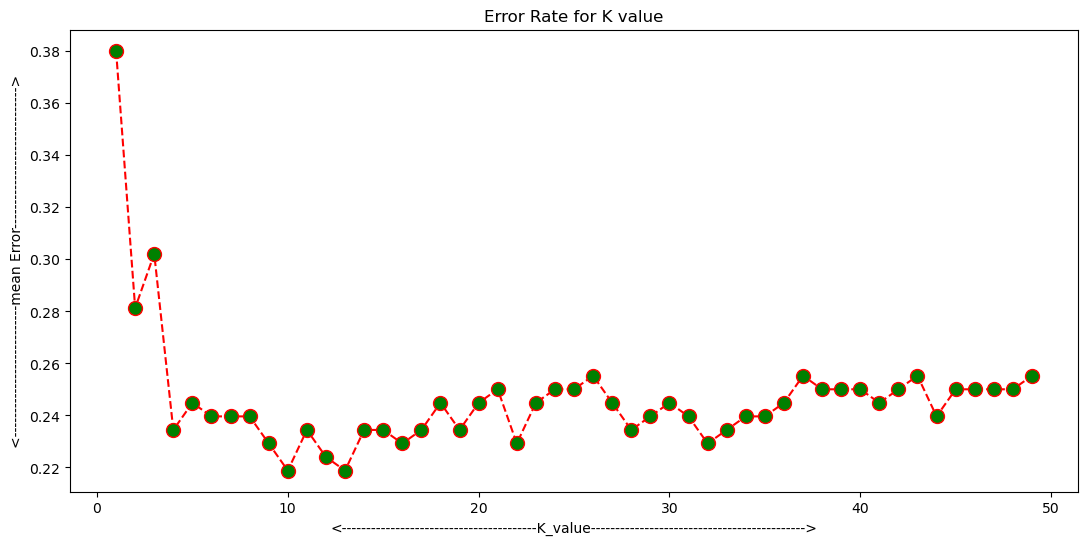

In [63]:
plt.figure(figsize=(13,6))
plt.plot(range(1,50),error,color='red',linestyle='dashed',marker='o', markerfacecolor='green', markersize = 10)
plt.title("Error Rate for K value")
plt.xlabel('<----------------------------------------K_value-------------------------------------------->')
plt.ylabel("<---------------------------mean Error----------------------------->")

### Hyperparameter Optimization for K value using RandomizedSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
knn = KNeighborsClassifier(n_neighbors = 5)

In [65]:
k = np.random.randint(1,10,10)
# define list of parameters for the model
KNN_params = {'n_neighbors': k, 'p':[2], 'metric':['minkowski']}
random_search =  RandomizedSearchCV(knn, KNN_params, n_iter = 10, cv = 7, n_jobs = -1, verbose = 0 )
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski'],
                                        'n_neighbors': array([3, 7, 7, 3, 9, 2, 3, 8, 4, 7]),
                                        'p': [2]})

In [66]:
print("Training Score : " + str(random_search.score(X_train,Y_train)))
print("Testing Score : " + str(random_search.score(X_test, Y_test)))

Training Score : 0.7881944444444444
Testing Score : 0.7708333333333334


In [67]:
print(random_search.best_params_)

{'p': 2, 'n_neighbors': 9, 'metric': 'minkowski'}


In [68]:
pred_KNN = random_search.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,pred_KNN)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_KNN))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_KNN))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_KNN))

Confusion Matrix : 
 [[112  18]
 [ 26  36]]
Accuracy :  0.7708333333333334
specificity1 :  0.8615384615384616
Sensitivity :  0.5806451612903226
MCC :  0.4598685942327356
AUC :  0.721091811414392
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       130
           1       0.67      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



In [69]:
# forb KNN
# Confusion Matrix : 
#  [[112  18]
#  [ 26  36]]
TP7 = 112
FP7 = 18
FN7 = 26
TN7 = 36


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP7,FN7,FP7,TN7)

SVM on PIDDD ---------------------->
TP 112
FN 26
FP 18
TN 36
Accuracy : 0.7708333333333334
Precision : 0.8615384615384616
Recall : 0.8115942028985508 
F1_score : 0.835820895522388
TPR : 0.8615384615384616
FPR : 0.3333333333333333


In [70]:
# KNN_params = {'n_neighbors':[1,5,10,9,20, 50], 'p':[2], 'metric':['minkowski']}

In [71]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = 9)

# knn.fit(xtrain,ytrain)

# knn.score(xtest,ytest)

# Decision Tree Model Hyperparameter optimization

In [72]:
DTC_parameters = {  'criterion':('entropy', 'gini','log_loss'), 
                    'splitter' : ('best', 'random'), 
                    'max_depth':(10, 50, 120),
                    'max_features' : ('auto','sqrt','log'),
                    
                 }

# 'max_sample_split' : (2,4,6) 

In [73]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier()

# Randomized Search CV

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
kfold = KFold( random_state=2, n_splits= 4, shuffle=True) # n_splits=2, random_state=None, shuffle=False len(X_train),
leave_validation=LeaveOneOut()
skfold=StratifiedKFold(n_splits=20,random_state=2,shuffle=True)  #n_splits=20

In [75]:
DTC_grid =  GridSearchCV(DTC_classifier, DTC_parameters, cv = 21 , n_jobs = -1,  verbose = True )

In [76]:
DTC_grid.fit(X_train,Y_train) # model fitting with training examples 

Fitting 21 folds for each of 54 candidates, totalling 1134 fits


GridSearchCV(cv=21, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('entropy', 'gini', 'log_loss'),
                         'max_depth': (10, 50, 120),
                         'max_features': ('auto', 'sqrt', 'log'),
                         'splitter': ('best', 'random')},
             verbose=True)

In [77]:
# to see the best_estimators
DTC_grid.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='sqrt',
                       splitter='random')

In [78]:
print("Training Score : " + str(DTC_grid.score(X_train,Y_train)))
print("Testing Score : " + str(DTC_grid.score(X_test, Y_test)))

Training Score : 0.8541666666666666
Testing Score : 0.6979166666666666


In [79]:
pred_DTC = DTC_grid.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test, pred_DTC)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_DTC))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_DTC))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_DTC))

Confusion Matrix : 
 [[107  23]
 [ 35  27]]
Accuracy :  0.6979166666666666
specificity1 :  0.823076923076923
Sensitivity :  0.43548387096774194
MCC :  0.27548694271071367
AUC :  0.6292803970223325
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       130
           1       0.54      0.44      0.48        62

    accuracy                           0.70       192
   macro avg       0.65      0.63      0.63       192
weighted avg       0.68      0.70      0.69       192



In [80]:
# Confusion Matrix : 
#  [[114  16]
#  [ 32  30]]
TP7 = 114
FP7 = 16
FN7 = 32
TN7 = 30


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP7,FN7,FP7,TN7)

SVM on PIDDD ---------------------->
TP 114
FN 32
FP 16
TN 30
Accuracy : 0.75
Precision : 0.8769230769230769
Recall : 0.7808219178082192 
F1_score : 0.8260869565217391
TPR : 0.8769230769230769
FPR : 0.34782608695652173


In [81]:
!pip install graphviz

In [82]:
# import graphviz  
# from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [83]:
# results = []
# names = []


# def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    
    
#     for name, model, params in models_opt:
    
#         #kfold = KFold(len(X_train), n_folds=5, random_state=2, shuffle=True)
#         skfold=StratifiedKFold(n_splits=5)
#         leave_validation=LeaveOneOut()

#         model_grid = GridSearchCV(model, params)

#         cv_results = cross_val_score(model_grid, X_train, Y_train, cv =leave_validation, scoring=scoring)

#         results.append(cv_results)

#         names.append(name)

#         msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

#         print(msg)

In [84]:
# kfold = KFold(len(X_train), random_state=2, shuffle=True)
# leave_validation=LeaveOneOut()
# skfold=StratifiedKFold(n_splits=5)
# model_grid_DTC = GridSearchCV(DTC_classifier, DTC_grid)
# cv_results = cross_val_score(model_grid_DTC, X_train, Y_train, cv =skfold, scoring='accuracy')

In [606]:
# # dot_data = export_graphviz(DTC_grid,   
#                       out_file=None, 
#                       feature_names=x.columns,       #Provide X Variables Column Names 
#                       class_names=df.columns[-1],      # Provide Target Variable Column Name
#                       filled=True, rounded=True,     # Controls the look of the nodes and colours it
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

In [310]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Accuracy Comparision

In [40]:
Data = pd.read_csv('../data/calculations.csv')

In [41]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Classification Model  8 non-null      object 
 1   Accuracy              8 non-null      float64
 2   Specificity           8 non-null      float64
 3   Sensitivity           8 non-null      float64
 4   Precision             8 non-null      float64
 5   AUC                   8 non-null      float64
 6   F1-Score              8 non-null      float64
 7   MCC                   8 non-null      float64
dtypes: float64(7), object(1)
memory usage: 640.0+ bytes


In [44]:
Data

,Classification Model,Accuracy,Specificity,Sensitivity,Precision,AUC,F1-Score,MCC
0,DT,75.00,87.69,48.38,87.69,68.03,0.82,0.39
1,KNN(k=9),77.08,86.15,58.06,86.15,72.10,0.83,0.45
2,RF,79.16,90.76,54.83,90.76,72.80,0.85,0.49
3,LR,80.72,90.00,61.29,90.76,74.41,0.86,0.52
4,SVM(Linear),80.20,90.00,59.67,82.39,74.83,0.86,0.52
5,SVM(RBF),77.08,91.53,46.77,91.53,69.15,0.84,0.44
6,SVM(poly),76.04,93.84,38.70,93.84,66.27,0.84,0.40
7,SVM(precomputed),80.20,90.00,59.67,90.00,74.83,0.86,0.74


### Accuracy Without Hyperparameter Tuning

<img src="../images/performances.png" width="100%">

<Figure size 1000x1400 with 0 Axes>

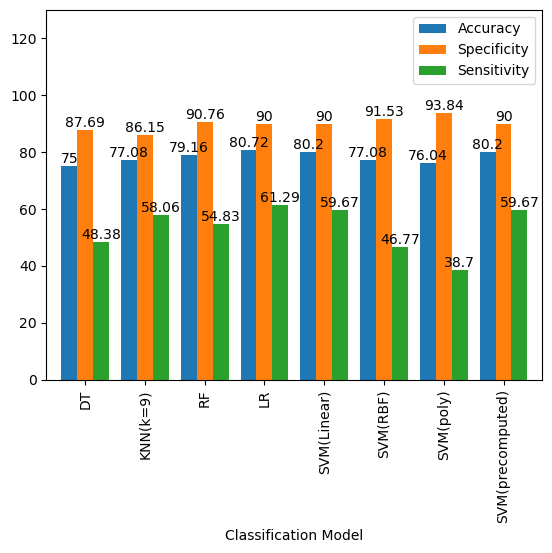

In [45]:
plt.figure(figsize=(10,14))
ax = Data.plot(kind='bar', x = 'Classification Model',y= ['Accuracy','Specificity', 'Sensitivity'] , width =0.8 )
plt.ylim(0,130)
for container in  ax.containers:
    ax.bar_label(container)

<Figure size 1000x1000 with 0 Axes>

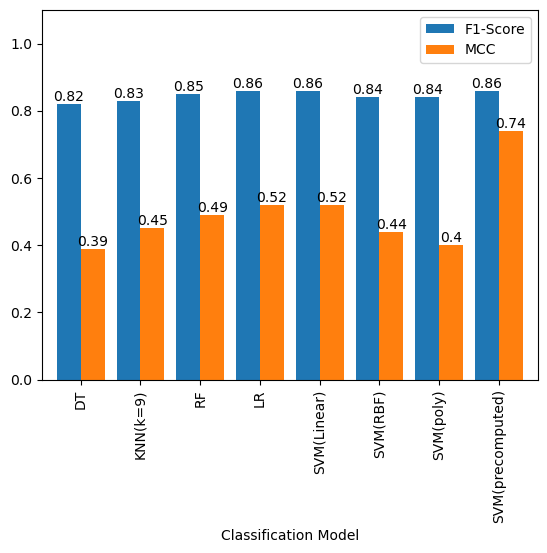

In [155]:
plt.figure(figsize=(10,10))
ax = Data.plot(kind='bar', x = 'Classification Model',y= ['F1-Score','MCC'] , width =0.8 )
plt.ylim(0,1.1)
for container in  ax.containers:
    ax.bar_label(container)

(0.0, 120.0)

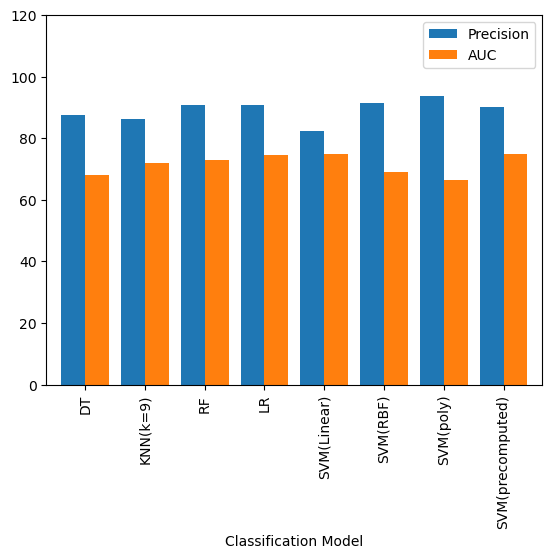

In [147]:

Data.plot( kind='bar', x = 'Classification Model', y= ['Precision','AUC'] , width =0.8 )
plt.ylim(0,120)
# for container in  ax.containers:
#     ax.bar_label(container)

In [142]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Classification Model  8 non-null      object 
 1   Accuracy              8 non-null      float64
 2   Specificity           8 non-null      float64
 3   Sensitivity           8 non-null      float64
 4   Precision             8 non-null      float64
 5   AUC                   8 non-null      float64
 6   F1-Score              8 non-null      float64
 7   MCC                   8 non-null      float64
dtypes: float64(7), object(1)
memory usage: 640.0+ bytes


### Thank You